In [1]:
import torch.nn as nn

In [11]:
class RNN(nn.Module):
    def __init__(self, hidden_size, in_size=1, out_size=1):
        super(RNN,self).__init__()
        self.rnn = nn.RNN(input_size= in_size,hidden_size= hidden_size,
                         batch_first= True)
        self.fc = nn.Linear(hidden_size, out_size)
    def forward(self,x,h=None):
        out,_ = self.rnn(x,h)
        last_hidden_states = out[:,-1]
        out= self.fc(last_hidden_states)
        return out, last_hidden_states

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:>

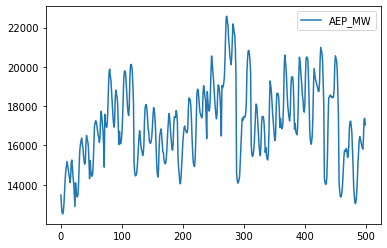

In [7]:
dataset= pd.read_csv('AEP_hourly.csv')
dataset[0:500].plot()

Fazer o script reproduzivel

In [10]:
import random
import torch
random.seed(1)
torch.manual_seed(1)

Parametros

In [11]:
# Tamanho da janela deslizante
features = 240
# Tamanho de datset test
test_ts_len = 300
# Tamanho do estado RNN oculto
rnn_hidden_size= 24
# Taxa de aprendizagem
learning =0.02
training_epochs= 500

Preparar o dataset para treinamento

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ts=dataset[['AEP_MW']]
scaled_ts = scaler.fit_transform(ts)

In [32]:
x_train,x_val,x_test,y_train,y_val,y_test= \
    get_training_datasets(scaled_ts,features, test_ts_len)

NameError: name 'get_training_datasets' is not defined

In [28]:
x_train

,AEP_MW
0,13478.0
1,12865.0
2,12577.0
3,12517.0
4,12670.0
...,...
121268,21089.0
121269,20999.0
121270,20820.0
121271,20415.0


In [54]:
def get_training_datasets(ts,features,test_len):
    X,Y= sliding_window(ts,features)
    

In [55]:
teste=get_training_datasets(ts,features,test_ts_len)

KeyError: 240

In [53]:
def sliding_window(ts,features):
    X=[]
    Y=[]
    for i in range(features+1,len(ts)+1):
        X.append(ts[i-(features+1):i-1])
        Y.append([ts[i-1]])
        print('X=',X)
    return X, Y
        

In [52]:
features

240